# Python Assignment
## Leila Fattel

In [1]:
# Importing needed packages
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
import pandas as pd

In [2]:
## 1 ##
# Documenting the function
def get_sequences_from_file(fasta_fn):
    """Description : Gets all the species name and corresponding sequences from a fasta file
    
       Parameters:
          fasta_fn : name of fasta file
       
       Return: a dictionary that is in the form of record.description[1] + "" + record.description[2] + record.seq
       
       Example of usuage:
          >> get_sequences_from_file("filename.fasta")
       
          Output:
             {'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet())} 
    """
    sequence_data_dict = {}  # Defining an empty variable
    for record in SeqIO.parse(fasta_fn, "fasta"):  # use function for fasta files
        description = record.description.split() # split output
        species_name = description[1] + " " + description[2] # define a new variable containing genus, space, species
        sequence_data_dict[species_name] = record.seq  # append empty variable with output of previous step
    return(sequence_data_dict)

In [3]:
help(get_sequences_from_file) # Making sure the function has been documented

Help on function get_sequences_from_file in module __main__:

get_sequences_from_file(fasta_fn)
    Description : Gets all the species name and corresponding sequences from a fasta file
       
          Parameters:
             fasta_fn : name of fasta file
          
          Return: a dictionary that is in the form of record.description[1] + "" + record.description[2] + record.seq
          
          Example of usuage:
             >> get_sequences_from_file("filename.fasta")
          
             Output:
                {'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
    'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet())}



In [4]:
sequences = get_sequences_from_file("penguins_cytb.fasta") # testing the function
sequences

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

In [65]:
## 2 ##
# THE STRING-TRANSLATE FUNCTION
def translate_function(string_nucleotides):     # create a new function called translate_function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # import codon table
    aa_seq_string = ""  # create an empty variable
    if len(string_nucleotides)%3 == 0:
        i = 0
        for i in range(0, len(string_nucleotides), 3):  # for loop to go through the sequence one codon (3 nucleotides at a time)
            codons = string_nucleotides[i:i+3] # create a variable called codons
            aa = mito_table.forward_table.get(codons, "stop") # create a variable for amino acid corresponding to table
            for codons in aa:
                if aa == 'stop':
                    break
                else:
                    aa_seq_string += aa  # add amino acid to aa_seq_string

            i += 3
        return("".join(aa_seq_string))

In [6]:
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [7]:
## 3 ##
# YOUR ALTERNATIVE FUNCTION
# Using BioPython library utilities,
# Documentation: http://biopython.org/DIST/docs/api/Bio.Seq-pysrc.html#translate

def biopython_translate(string_nucleotides):
    aa_string = Seq.translate(string_nucleotides, table = 2, to_stop = True) 
    return aa_string

In [8]:
## 4 ##
# YOUR COUNT AA ANALYSIS FUNCTION
# define compute_molecular_weight(aa_seq):
from Bio.SeqUtils.ProtParam import ProteinAnalysis # import required packages
def compute_molecular_weight(aa_seq):  
    analysed_seq = ProteinAnalysis(aa_seq) # creates new variable that contains aa_seq which is needed for the function to calculate molecular weight
    seq_aa_weight = analysed_seq.molecular_weight() # new variable that contains molecular weight calculated in the previous step
    return(seq_aa_weight)

In [9]:
## 5 ##
# YOUR GC CONTENT ANALYSIS FUNCTION
def calculate_GC_content(string_nucleotides):
    count = 0 # creating variable and setting it to 0
    for base in string_nucleotides:  # creates a for loop to go through the sequences provided and adds 1 if nucleotide is either G or C
        if (base == 'G' or base == 'C'):
            count += 1
    return(count / len(string_nucleotides)*100) # returns output containing the percentage of GC content of the provided sequences 

### Main

In [10]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [11]:
## 6 ## 
# Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
penguins_df['molecular_weight'] = 'NaN' # Setting values to Nan indicating that they are currently empty
penguins_df['GC_content'] = 'NaN'
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [67]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
for key, value in cytb_seqs.items():
    aa_seq = translate_function(str(value)) # uses translate_function defined previously to translate DNA sequences provided and to be stored in newly created object aa_seq
    mol_weight = compute_molecular_weight(str(aa_seq)) # uses compute_molecular_weight function to be stored in newly created object mol_weight
    GC = calculate_GC_content(value) # uses calculate_GC_content function to be stored in newly created object GC
    penguins_df.loc[penguins_df['species'].str.contains(key), 'molecular_weight'] = mol_weight # fills computed molecular weight to respective species in each row
    penguins_df.loc[penguins_df['species'].str.contains(key), 'GC_content'] = GC # fills computed GC content to respective species in each row
penguins_df # views dataframe

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


In [72]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
from bokeh.plotting import figure  # importing needed tools for plotting with bokeh and visualizing it on jupyter notebook
from bokeh.io import output_notebook, show
output_notebook()
import numpy as np
%matplotlib inline
my_fig = figure(x_range=penguins_df.species, plot_height=250, title="Average Mass per Species") # plotting species in the x-axis, specifying height of boxes and title
my_fig.vbar(x=penguins_df.species, top=penguins_df.mass, width=0.9) # specifying x-axis, y-axis(top) and width of boxes
my_fig.xgrid.grid_line_color = None # removing grid line colors
my_fig.y_range.start = 0
my_fig.xaxis.major_label_orientation = 45  # rotating the labels on the x-axis to make them clearer
my_fig.title.align = 'center'  # aligning title in the center
show(my_fig)

Loading BokehJS ...

8)
Q1- What is the smallest penguin species?
Eudyptula minor

8)
Q2- What else is interesting about this species?
It is found in Australia and these penguins are noctornal 
Documentation: http://www.penguinworld.com/types/little.html

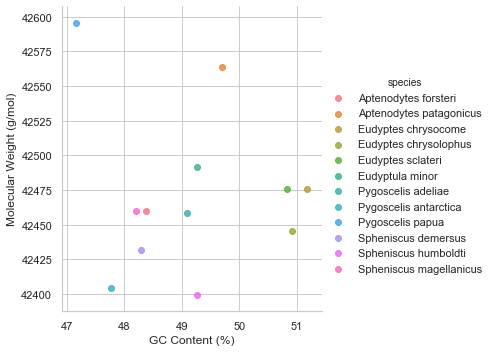

In [73]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
import matplotlib.pyplot as plt # import needed packages for plotting with seaborn
import seaborn as sns
%matplotlib inline
fig = sns.lmplot("GC_content", "molecular_weight", data=penguins_df, fit_reg=False, hue="species") # specifying x-axis, y-axis, dataframe, removing fit regression, and coloring according to species
fig.set_axis_labels('GC Content (%)', 'Molecular Weight (g/mol)') # adding labels

In [70]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv("penguins_mass_cytb.csv", index = False) # saving new dataframe in .csv format

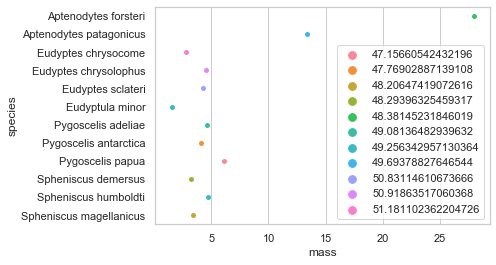

In [71]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)
import pandas as pd # import plotting packages
import seaborn as sns
# Plotting species vs mass and their respective GC content
sns.set(style="whitegrid", palette="muted")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="mass", y="species", hue="GC_content", data=penguins_df)
plt.legend(loc='lower right')